In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel('online_retail_II.xlsx' , sheet_name= 1)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [4]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [7]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [8]:
df[df['Customer ID'].isna()].sort_values('Quantity')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
115808,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom


In [9]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [10]:
df[df['Customer ID'] == 15311.0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
107,536381,84854,GIRLY PINK TOOL SET,5,2010-12-01 09:41:00,4.95,15311.0,United Kingdom
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-01 09:41:00,1.95,15311.0,United Kingdom
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,2010-12-01 09:41:00,2.10,15311.0,United Kingdom
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
...,...,...,...,...,...,...,...,...
541746,581571,23167,SMALL CERAMIC TOP STORAGE JAR,96,2011-12-09 12:00:00,0.69,15311.0,United Kingdom
541747,581571,21314,SMALL GLASS HEART TRINKET POT,48,2011-12-09 12:00:00,1.85,15311.0,United Kingdom
541748,581571,21137,BLACK RECORD COVER FRAME,24,2011-12-09 12:00:00,3.39,15311.0,United Kingdom
541749,581571,44234,ASSORTED CIRCULAR MOBILE,1,2011-12-09 12:00:00,0.21,15311.0,United Kingdom


In [11]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == False]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [12]:
df['Invoice'].str.replace("[0-9]","", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df['Invoice'].str.match("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [14]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541841,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541847,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom
541856,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [15]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


In [16]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [17]:
# We have to check each of them
df[df['StockCode'].str.match("^POST")]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5095,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713.0,Germany


In [18]:
df[df['StockCode'].str.match("^D$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [19]:
df[df['StockCode'].str.match("^C2$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
515001,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.0,NaN,EIRE
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE


In [20]:
df[df['StockCode'].str.match("^DOT$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5686,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


In [21]:
df[df['StockCode'].str.match("^M$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5685,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [22]:
df[df['StockCode'].str.match("^S$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom
480961,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom
480962,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom


In [23]:
df[df['StockCode'].str.match("^DCGS0072$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.0,NaN,United Kingdom


In [24]:
df[df['StockCode'].str.match("^DCGS0069$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom
279255,561252,DCGS0069,ebay,-5,2011-07-26 11:52:00,0.00,NaN,United Kingdom


In [25]:
df[df['StockCode'].str.match("^DCGS0066P$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
279254,561255,DCGS0066P,NaN,-3,2011-07-26 11:52:00,0.0,NaN,United Kingdom


In [26]:
df[df['StockCode'].str.match("^PADS$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358670,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


In [27]:
df[df['StockCode'].str.match("^B$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [28]:
df[df['StockCode'].str.match("^CRUK$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324003,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333745,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338812,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
350582,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom
361589,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom
389964,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom
416112,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom


In [29]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [30]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


NOTES

1) will not include empty customer id rows in clustering 
2) invoice with 'A' does not have customer id , so will not be considered
3) StockCode Analysis
| POST - will not include in clustering because we do not want to include postage charge
| D - shows discount , not included
| C2 - Carriage charges , not included
| DOT - shows Postage , not included
| M,m - Manual Tranactions , Not included
| BANK CHARGES - bank Charges, Not included
| AMAZONFEE - not included
| S - samples , Not Included
| PADS - Included
| B - Adjusted Bad Debt , Not included
| CRUK - Comission , not included
| gift__XXX - gifts, Not included for now
| DCGS - some quantities are negative though and customer ID is null



## Data Cleaning ##


In [31]:
cleaned_df  = df.copy()

In [32]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

In [33]:
mask = (cleaned_df['Invoice'].str.match("^\\d{6}$") == True)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [34]:
mask2 = ((cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True) | (cleaned_df['StockCode'].str.match("^\\d{5}$") == True) | (cleaned_df['StockCode'].str.match("^PADS$") == True))

cleaned_df = cleaned_df[mask2]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [35]:
cleaned_df.dropna(subset='Customer ID',inplace= True)

C:\Users\gupta\AppData\Local\Temp\ipykernel_18652\8358232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset='Customer ID',inplace= True)


In [36]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396374.000000,396374,396374.000000,396374.000000
mean,13.046353,2011-07-11 00:04:48.847805440,2.867954,15301.603824
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.732689,NaN,4.264554,1709.976485


In [37]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [38]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396340.000000,396340,396340.000000,396340.000000
mean,13.012456,2011-07-11 00:04:40.164908544,2.868200,15301.689070
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.640568,NaN,4.264654,1709.957487


In [39]:
cleaned_df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [40]:
len(cleaned_df)

396340

In [41]:
len(df)

541910

In [42]:
len(cleaned_df)/len(df)

0.7313760587551439

Dropped around 27% of records during cleaning

## Feature Engineering ##


In [43]:
cleaned_df['SalesLineTotal'] = cleaned_df['Price']*cleaned_df['Quantity']

C:\Users\gupta\AppData\Local\Temp\ipykernel_18652\3252710968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Price']*cleaned_df['Quantity']


In [44]:
cleaned_df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [45]:
aggregated_df = cleaned_df.groupby('Customer ID' , as_index= False).agg(
    MonetaryValue = ('SalesLineTotal' , 'sum'),
    Frequency = ('Invoice', 'nunique'),
    LastInvoiceDate = ('InvoiceDate', 'max')
)

aggregated_df.head(10)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
5,12352.0,1385.74,7,2011-11-03 14:37:00
6,12353.0,89.00,1,2011-05-19 17:47:00
7,12354.0,1079.40,1,2011-04-21 13:11:00
8,12355.0,459.40,1,2011-05-09 13:49:00
9,12356.0,2487.43,3,2011-11-17 08:40:00


In [46]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date-aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309
5,12352.0,1385.74,7,2011-11-03 14:37:00,35
6,12353.0,89.00,1,2011-05-19 17:47:00,203
7,12354.0,1079.40,1,2011-04-21 13:11:00,231
8,12355.0,459.40,1,2011-05-09 13:49:00,213
9,12356.0,2487.43,3,2011-11-17 08:40:00,22


In [47]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,4334.000000,4334.000000,4334.000000,4334,4334.000000
mean,15299.251731,2021.473616,4.245962,2011-09-08 07:38:29.487771136,91.703046
min,12346.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13812.250000,305.560000,1.000000,2011-07-20 10:55:00,17.000000
50%,15297.500000,668.125000,2.000000,2011-10-20 09:48:30,50.000000
75%,16778.750000,1631.622500,5.000000,2011-11-22 11:05:45,142.000000
max,18287.000000,279138.020000,206.000000,2011-12-09 12:50:00,373.000000
std,1721.994109,8907.501378,7.634989,NaN,100.177047


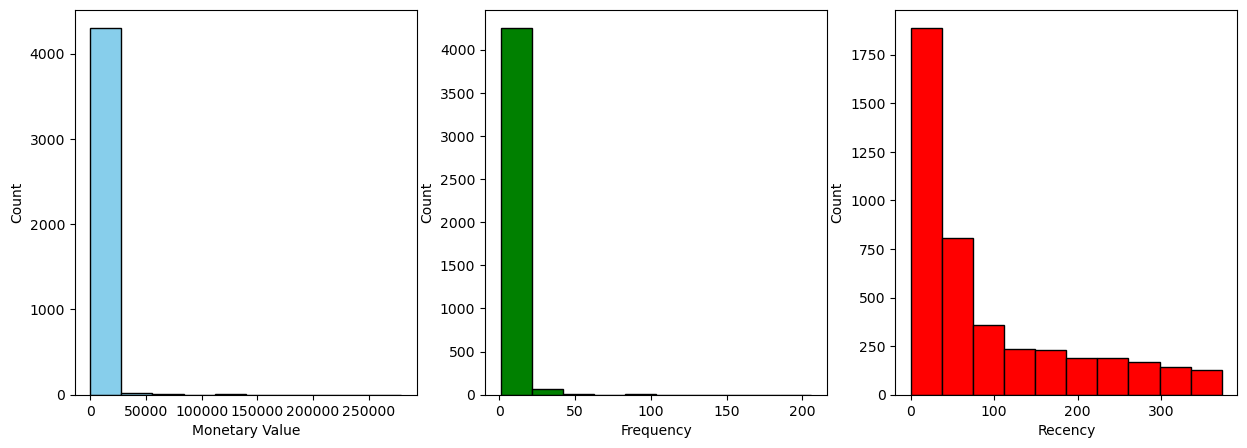

In [48]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins= 10 , color='skyblue' , edgecolor = 'black')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins= 10 , color='green' , edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins= 10 , color='red' , edgecolor = 'black')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.show()

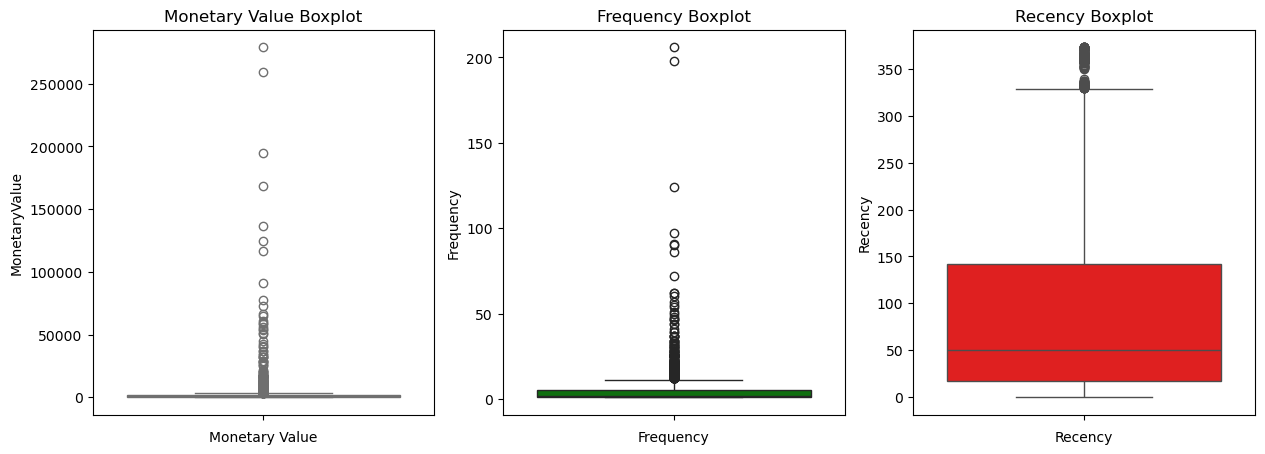

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='green')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='red')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.show()

In [50]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25) 
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3-M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5*M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5*M_IQR))].copy()
monetary_outliers_df.head(5)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32
12,12359.0,6372.58,4,2011-10-13 12:47:00,57
15,12362.0,4737.23,10,2011-12-06 15:40:00,2


In [51]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.066978,NaN,47.076383


In [52]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25) 
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1

Frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5*F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5*F_IQR))].copy()
Frequency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.166586,NaN,30.366616


In [53]:
non_Outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(Frequency_outliers_df.index))]

non_Outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863.000000
mean,15323.852705,853.814417,2.755113,2011-08-31 01:42:04.721718784,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.731704,794.608100,2.168124,NaN,101.866688


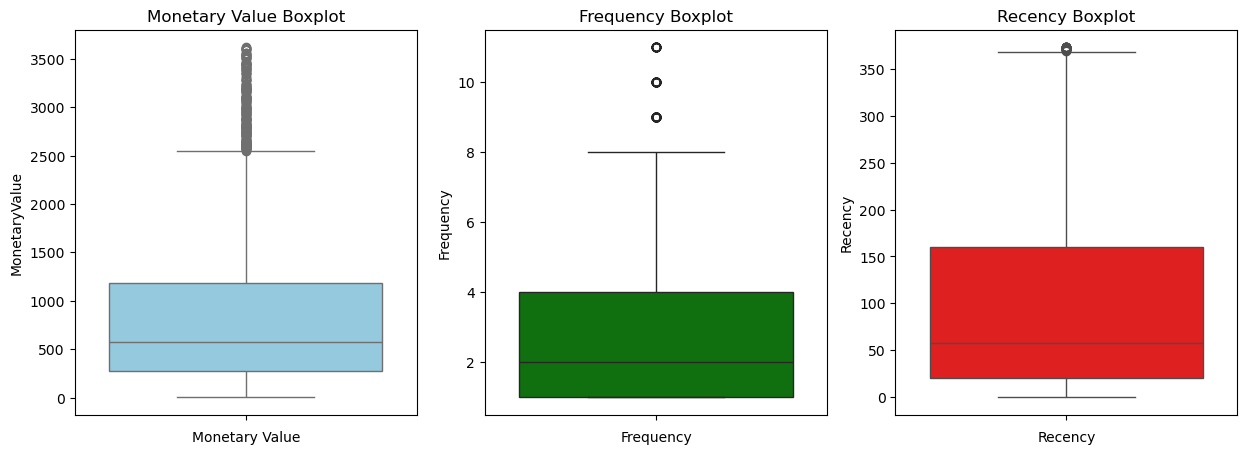

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_Outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(non_Outliers_df['Frequency'], color='green')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(non_Outliers_df['Recency'], color='red')
plt.title('Recency Boxplot')
plt.xlabel('Recency')


plt.show()

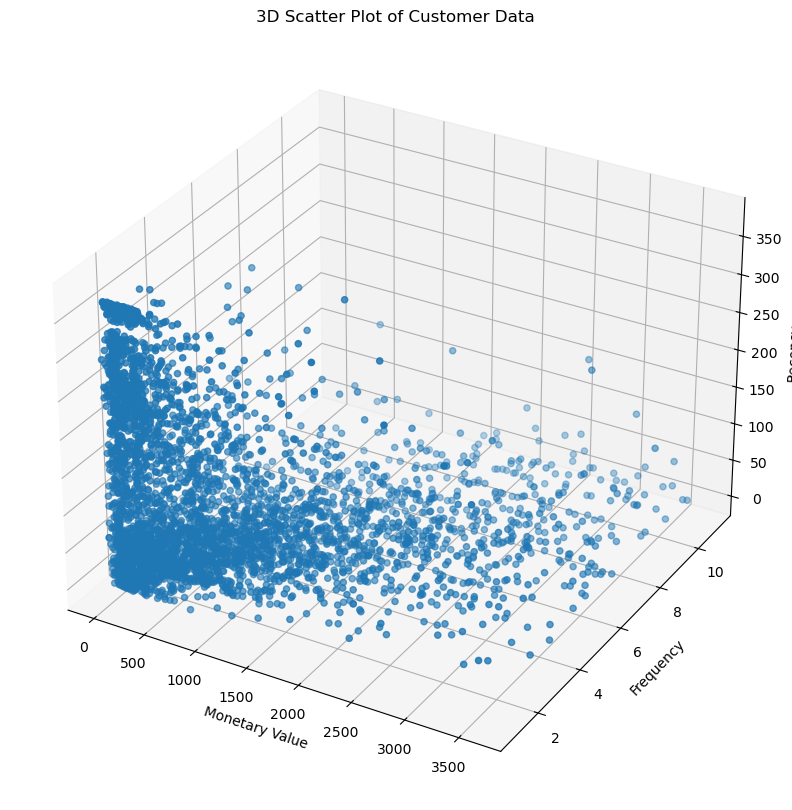

In [55]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_Outliers_df['MonetaryValue'],non_Outliers_df['Frequency'],non_Outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [56]:
Scalar = StandardScaler()

scaled_data = Scalar.fit_transform(non_Outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [57]:
scaled_data_df = pd.DataFrame(scaled_data ,index = non_Outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.734326,0.574252,-0.254717
3,0.759889,-0.809612,-0.804526
4,-0.704104,-0.809612,2.052518
5,0.669505,1.958116,-0.637620
6,-0.962630,-0.809612,1.011808
...,...,...,...
4328,-0.855771,-0.809612,-0.264535
4329,-0.847338,-0.809612,1.738342
4330,-0.972926,-0.809612,0.785993
4331,-0.850547,-0.348324,-0.912525


In [58]:
scaled_data_df.describe()

,MonetaryValue,Frequency,Recency
count,3.863000e+03,3.863000e+03,3.863000e+03
mean,3.678709e-18,-1.213974e-16,1.195581e-17
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.069929e+00,-8.096124e-01,-9.812508e-01
25%,-7.241166e-01,-8.096124e-01,-7.750723e-01
50%,-3.566426e-01,-3.483244e-01,-4.118054e-01
75%,4.193686e-01,5.742516e-01,5.896329e-01
max,3.480601e+00,3.803268e+00,2.680872e+00


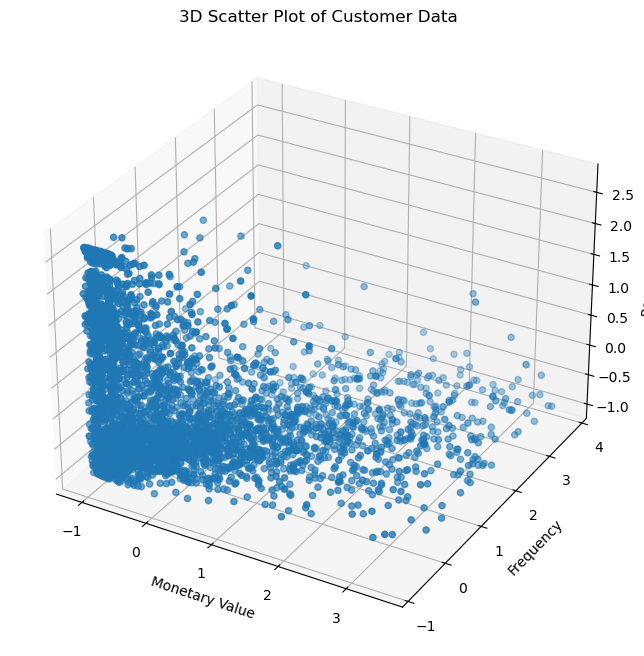

In [59]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering ##

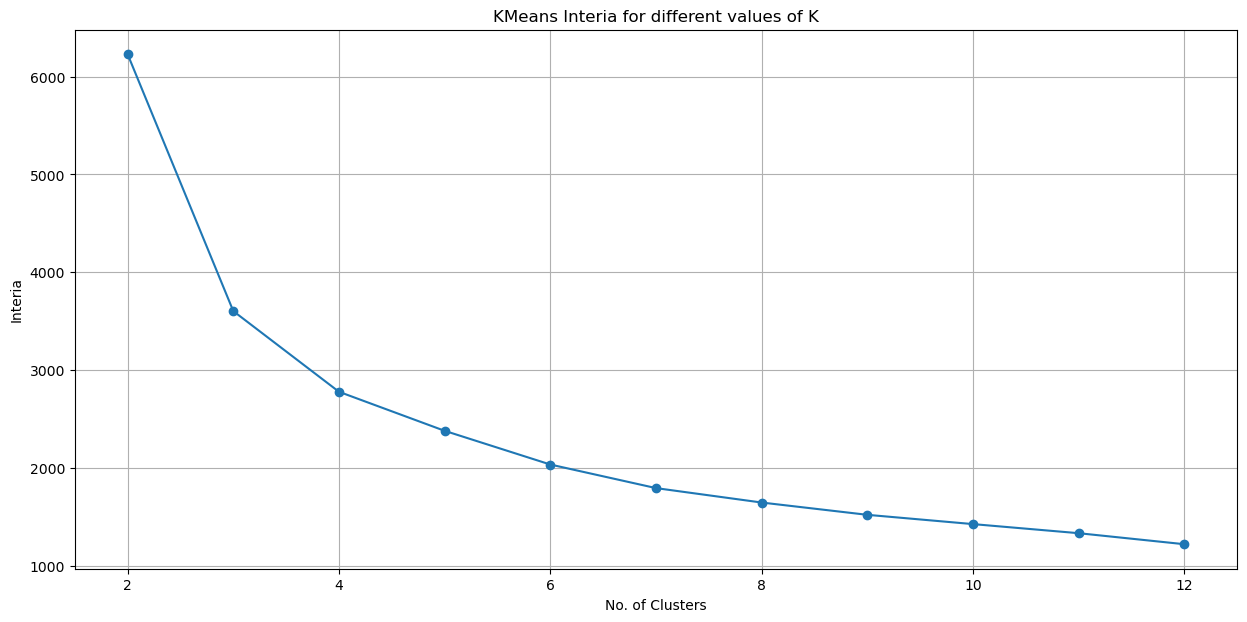

In [60]:
k_max = 12 

interia = []
k_values = range(2,k_max+1)

for i in k_values:
    km = KMeans(n_clusters= i , max_iter= 1000, random_state= 42)
    km.fit_predict(scaled_data_df)
    interia.append(km.inertia_)

plt.figure(figsize=(15,7))
plt.plot(k_values,interia, marker = 'o')
plt.xlabel('No. of Clusters')
plt.ylabel('Interia')
plt.title('KMeans Interia for different values of K')
plt.grid(True)

In [61]:
for i in k_values:
    km = KMeans(n_clusters= 4 , max_iter= 1000, random_state= 42)
    Cluster_labels = km.fit_predict(scaled_data_df)

Cluster_labels

array([3, 0, 1, ..., 1, 0, 3])

In [62]:
non_Outliers_df['Cluster'] = Cluster_labels
non_Outliers_df

C:\Users\gupta\AppData\Local\Temp\ipykernel_18652\991834993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_Outliers_df['Cluster'] = Cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,73,0
4329,18280.0,180.60,1,2011-03-07 09:52:00,277,1
4330,18281.0,80.82,1,2011-06-12 10:53:00,180,1
4331,18282.0,178.05,2,2011-12-02 11:43:00,7,0


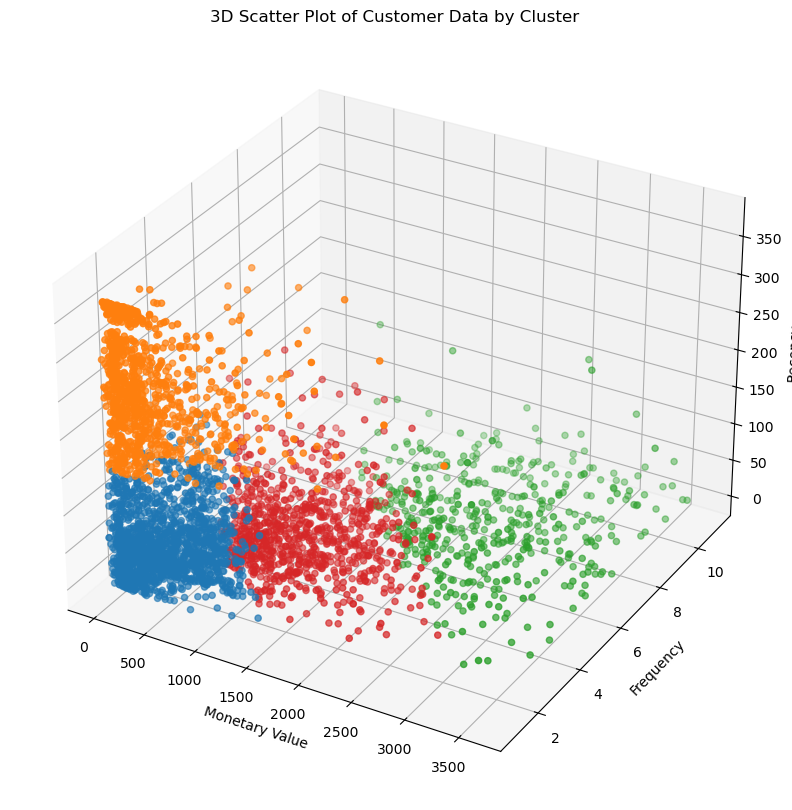

In [63]:
cluster_colors = {0: '#1f77b4', 
                  1: '#ff7f0e',  
                  2: '#2ca02c',  
                  3: '#d62728'} 

colors = non_Outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_Outliers_df['MonetaryValue'], 
                     non_Outliers_df['Frequency'], 
                     non_Outliers_df['Recency'], 
                     c=colors,  
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

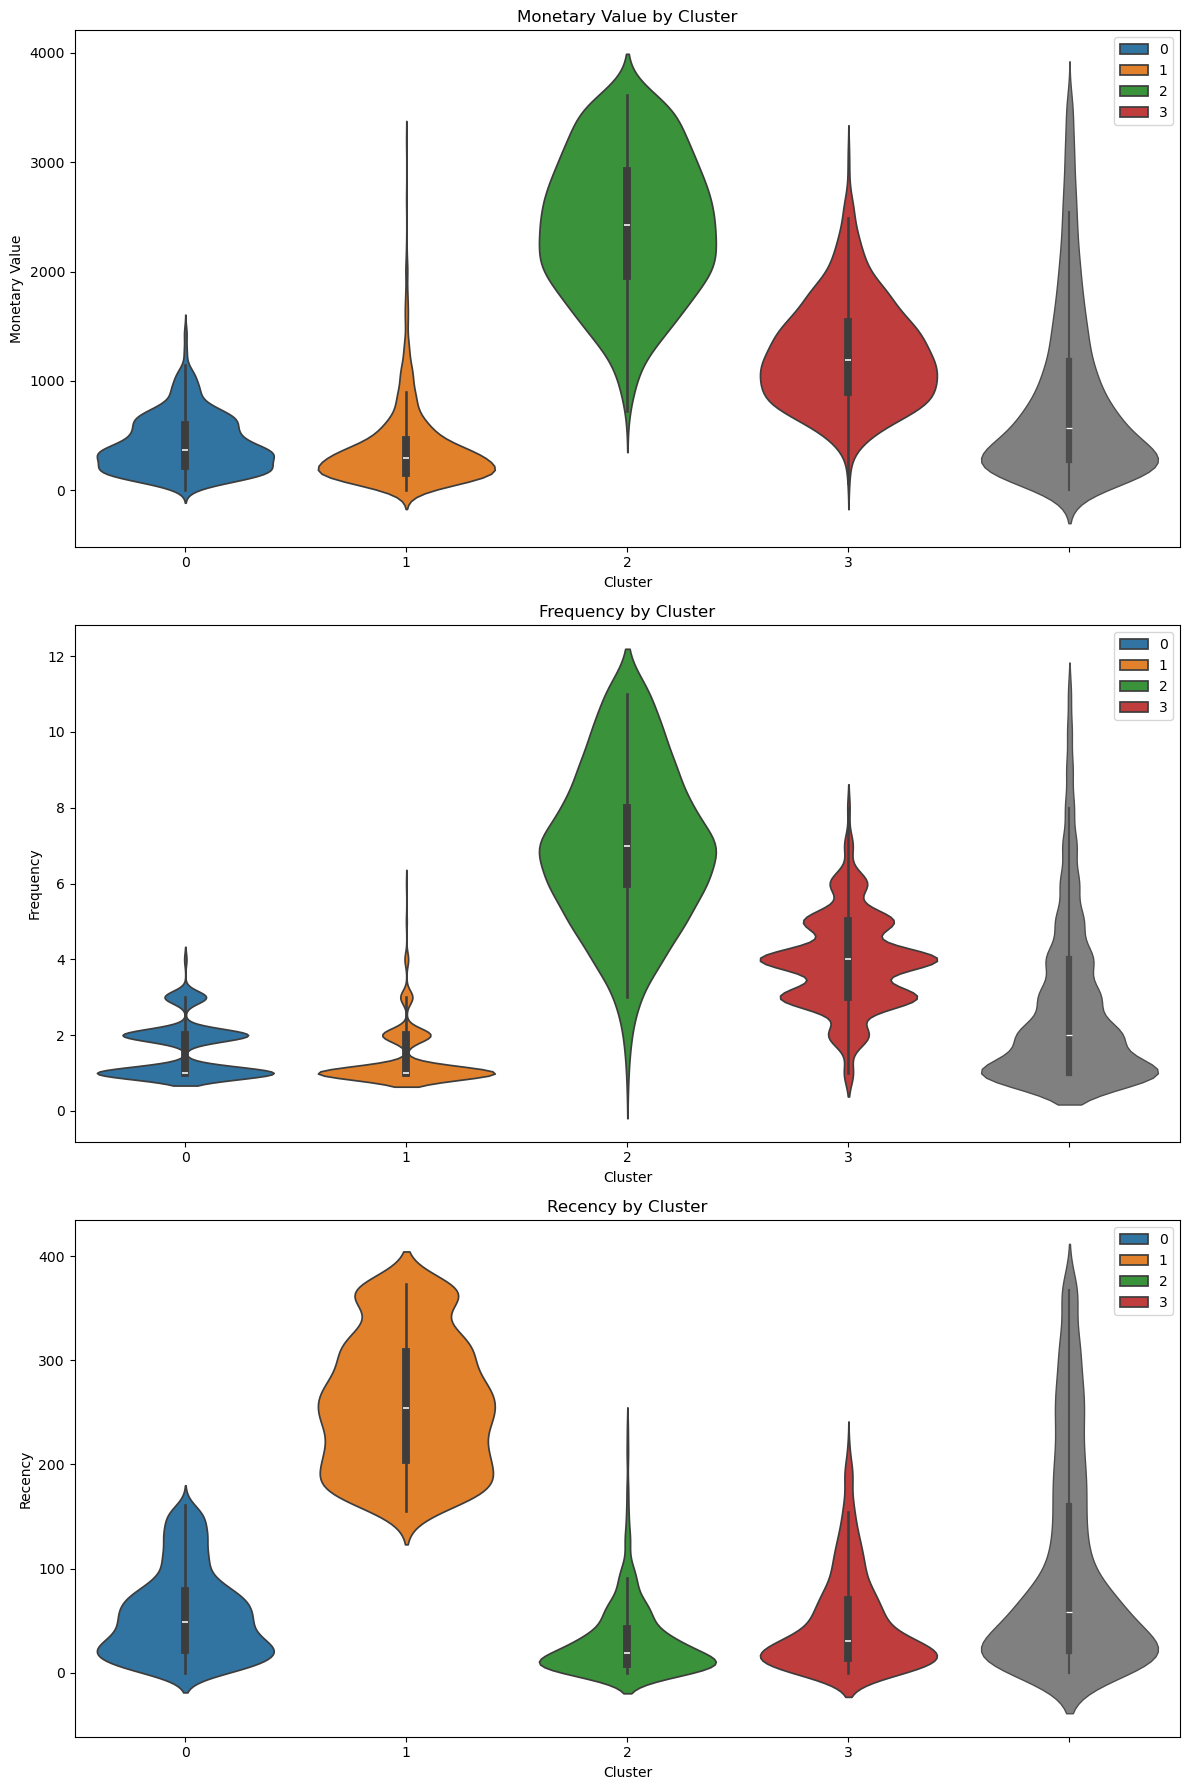

In [64]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_Outliers_df['Cluster'], y=non_Outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_Outliers_df["Cluster"])
sns.violinplot(y=non_Outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_Outliers_df['Cluster'], y=non_Outliers_df['Frequency'], palette=cluster_colors, hue=non_Outliers_df["Cluster"])
sns.violinplot(y=non_Outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_Outliers_df['Cluster'], y=non_Outliers_df['Recency'], palette=cluster_colors, hue=non_Outliers_df["Cluster"])
sns.violinplot(y=non_Outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Cluster Anaylsis #

1) Cluster 0 (Blue) : 
* This Cluster represents low value and less frequent customers but they have made recent purchases. These customers may be new.
* Need to build relationships , provide incentive and excellent customer service.

2) Cluster 1 (Orange) :
* This cluster represents least value , least frequent and also haven't purchased recently.
* Use targeting marketing campaigns , special discount offers and remainder emails to make them more active.

3) Cluster 2 (Green) :
* This Cluster represents Highest Value , Most Frequent and most recent customers. They are the most loyal customers.
* A Robust Loyalty Program can be introduced. Provided Exclusive Offers and special customer service to keep them satisfied.

4) Cluster 3 (Red) :
* This Cluster repesents High value and frequent customers who are not very recent . Focus should be on retention efforts and rewarding their loyalty.
* Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.




## Outlier Analysis ##

In [65]:
overlap_indices = monetary_outliers_df.index.intersection(Frequency_outliers_df.index)

monetary_only_outliers_df = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers_df = Frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers_df = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers_df['Cluster'] = -1
frequency_only_outliers_df['Cluster'] = -2
monetary_and_frequency_outliers_df['Cluster'] = -3

outliers_df = pd.concat([monetary_only_outliers_df,frequency_only_outliers_df,monetary_and_frequency_outliers_df])

outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


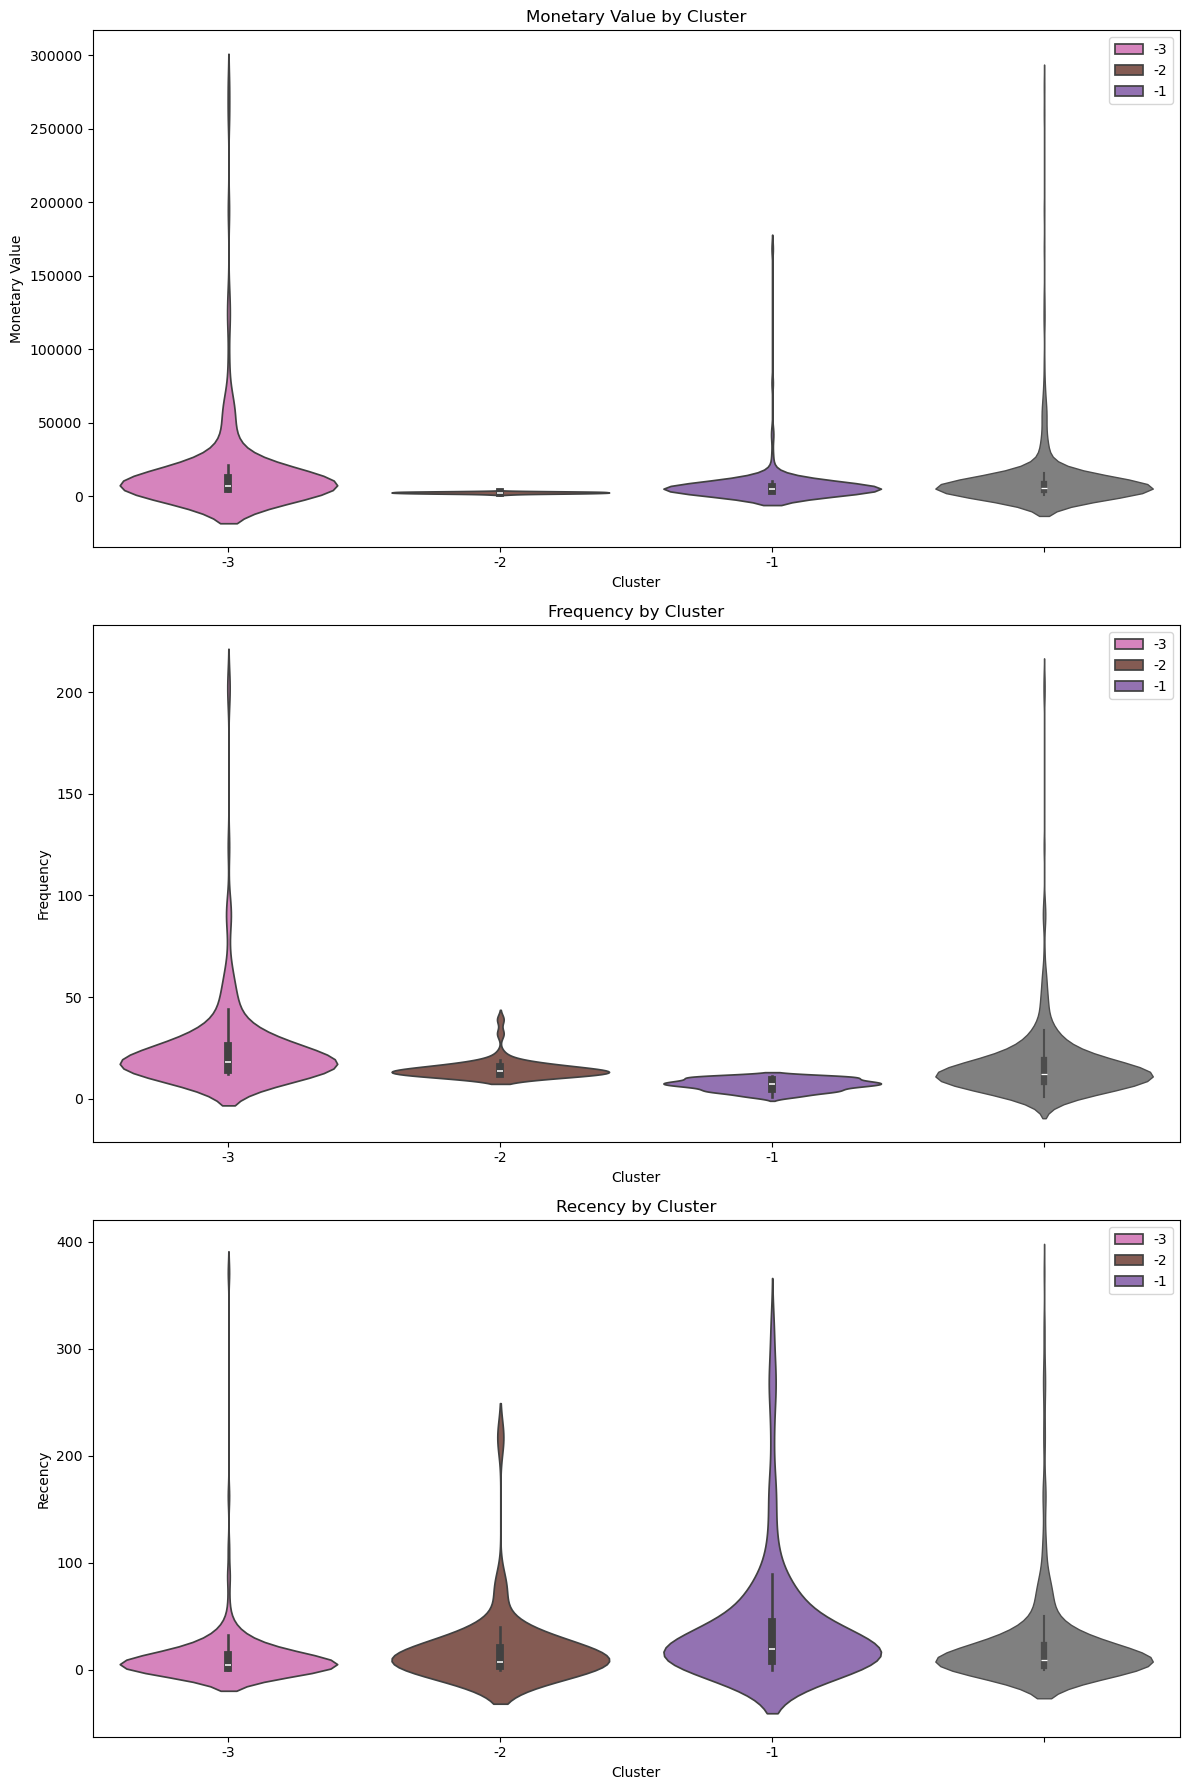

In [66]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['MonetaryValue'], palette=cluster_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Frequency'], palette=cluster_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Recency'], palette=cluster_colors, hue=outliers_df["Cluster"])
sns.violinplot(y=outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Outlier Cluster Anaylsis ##

1) Cluster -1 (Monetary Outliers)
* This cluster represents Customer with high monetary value and low frequency. Less but large Purchases.
* Focus should be on maintaining loyality through personalized offers and services.


2) Cluster -2 (Frequency Outliers)
* Frequent buyers who spend less.
* Can offer bundle deals to encourage higher spending per order


3) Cluster -3 (Both Monetary and Frequency Outliers) 
* These are the best and most valuable customers with high spending and frequent purchases. 
* Develop VIP programs and exclusive offers to maintain loyalty and continued engagement.



In [67]:
full_clustered_df = pd.concat([non_Outliers_df,outliers_df])

full_clustered_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


In [68]:
Cluster_counts = full_clustered_df['Cluster'].value_counts()
Cluster_counts

Cluster
 0    1549
 1     942
 3     890
 2     482
-3     232
-1     193
-2      46
Name: count, dtype: int64

## Visualization ##

C:\Users\gupta\AppData\Local\Temp\ipykernel_18652\1183634533.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


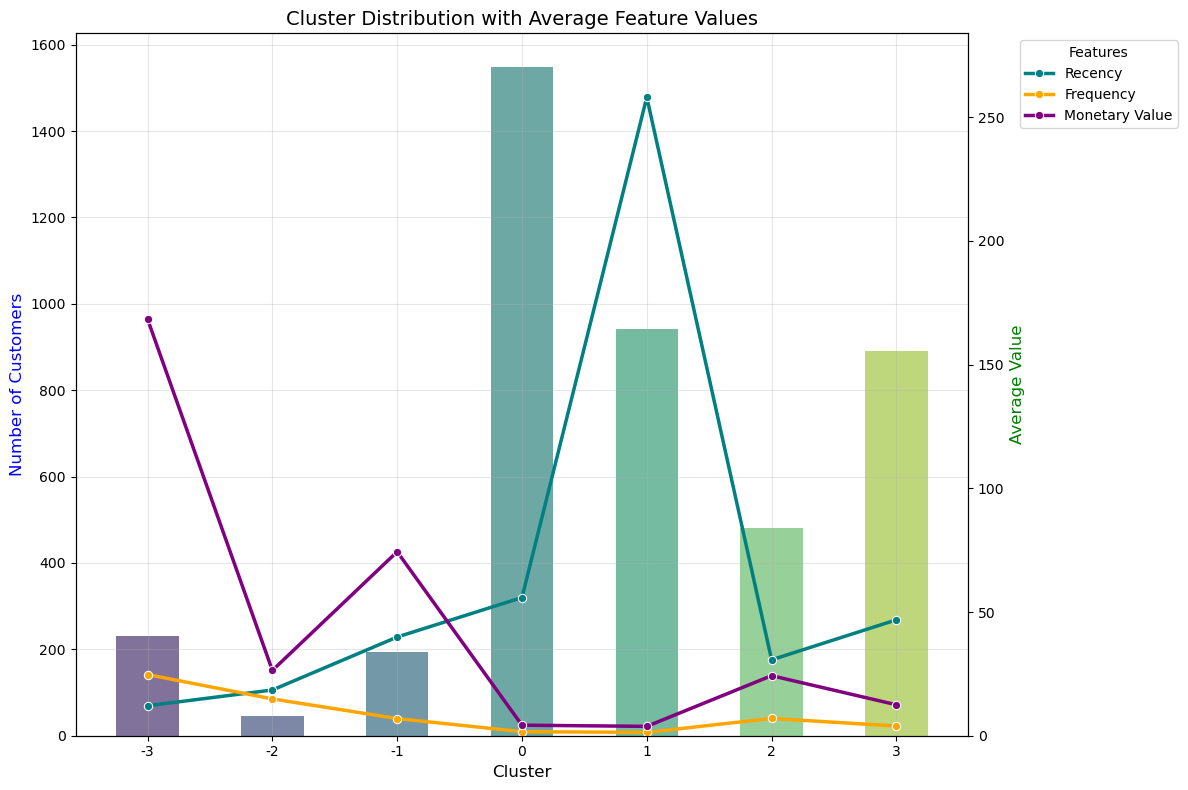

In [70]:
full_clustered_df["MonetaryValue per 100 pounds"] = full_clustered_df["MonetaryValue"] / 100.0
feature_means = full_clustered_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()
Cluster_counts = full_clustered_df['Cluster'].value_counts().sort_index()


clusters = list(Cluster_counts.index)  

fig, ax1 = plt.subplots(figsize=(12, 8))

x_positions = np.arange(len(clusters))  


sns.barplot(
    x=x_positions,
    y=Cluster_counts.values,
    ax=ax1,
    palette='viridis',
    width=0.5,
    alpha=0.7  
)
ax1.set_ylabel('Number of Customers', color='b', fontsize=12)
ax1.set_title('Cluster Distribution with Average Feature Values', fontsize=14)
ax1.set_xlabel('Cluster', fontsize=12)

ax1.set_xticks(x_positions)  
ax1.set_xticklabels(clusters) 


ax2 = ax1.twinx()

sns.lineplot(
    x=x_positions,
    y=feature_means['Recency'],
    marker='o',
    ax=ax2,
    label='Recency',
    color='teal',
    linewidth=2.5
)
sns.lineplot(
    x=x_positions,
    y=feature_means['Frequency'],
    marker='o',
    ax=ax2,
    label='Frequency',
    color='orange',
    linewidth=2.5
)
sns.lineplot(
    x=x_positions,
    y=feature_means['MonetaryValue per 100 pounds'],
    marker='o',
    ax=ax2,
    label='Monetary Value',
    color='purple',
    linewidth=2.5
)
ax2.set_ylabel('Average Value', color='g', fontsize=12)


ax2.set_ylim(0, feature_means.max().max() * 1.1) 


ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title="Features")


ax1.grid(alpha=0.3)

fig.tight_layout()
plt.show()
